# Example -2  Introduction to t-SNE for Clustering Visualization

This notebook demonstrates how to use **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to perform dimensionality reduction and visualize clustering relationships among organisms based on their phenotypic growth predictions. The process involves reducing high-dimensional data into a 2D space to identify clusters and relationships visually.

## Step 1: Load Necessary Libraries
We import essential Python libraries:
- **pandas**: For data manipulation and loading tabular data.
- **matplotlib**: For plotting the clustering results.
- **sklearn.manifold.TSNE**: For dimensionality reduction using t-SNE.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Step 2: Load the Data
We load two phenotype prediction datasets:
- ENIGMA dataset  (couresty of ENIGMA group, and Hira Lesea)
- PMI dataset     (courtesy of PMI group, and Ranjan Priya)

The first column of each dataset is set as the index (organism names).

In [58]:
# Load the data
enigma_data = pd.read_csv('ENIGMA_phenoPredictions_CompleteM.tsv', sep='\t', index_col=0)
pmi_data = pd.read_csv('PMI_phenoPredictions_CompleteM.tsv', sep='\t', index_col=0)

## Step 3: Label and Combine the Datasets
Each dataset is labeled to indicate its source (ENIGMA or PMI), and then the two datasets are combined into a single DataFrame to facilitate unified analysis.

In [59]:
# Label the datasets
enigma_data['Dataset'] = 'ENIGMA'
pmi_data['Dataset'] = 'PMI'

In [60]:
# Combine the datasets
combined_data = pd.concat([enigma_data, pmi_data])

## Step 4: Prepare Data for t-SNE
We separate the dataset labels (used for coloring in the visualization) and the binary growth prediction data. The latter is used as the feature matrix for dimensionality reduction.

In [61]:
# Separate the 'Dataset' column for coloring and drop it from the feature matrix
labels = combined_data['Dataset']
feature_matrix = combined_data.drop(columns=['Dataset'])

## Step 5: Perform t-SNE Dimensionality Reduction
We use t-SNE to reduce the high-dimensional feature matrix to 2D. This reduction:
- Helps identify clusters of similar organisms.
- Preserves local and global structure in the data.
- Creates a visually interpretable 2D representation.

In [62]:
# Perform t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
#tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(feature_matrix)

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


#### t-SNE Initialization: `TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)`

The `TSNE` object is initialized with the following parameters:

- **`n_components=2`**:
  - Specifies the number of dimensions in the output space.
  - The high-dimensional input data will be reduced to 2 dimensions, typically for visualization purposes.
  
- **`random_state=42`**:
  - Ensures reproducibility by setting a fixed seed for randomness.
  - Without this parameter, the results may vary slightly between runs due to the stochastic nature of t-SNE.
  - The value `42` is commonly used in data science as a default seed, but any fixed integer can be used.

- **`perplexity=30`**:
  - Controls the balance between local and global data structure.
  - Determines the number of effective neighbors each data point considers.
  - Typical values range between 5 and 50, depending on the dataset size (smaller perplexity for smaller datasets).

- **`n_iter=300`**:
  - Specifies the number of optimization iterations to refine the t-SNE representation.
  - Higher values may produce better results at the cost of longer computation time.

---

#### Fit and Transform: `tsne.fit_transform(feature_matrix)`

This step applies t-SNE to the input data (`feature_matrix`) and transforms it into the lower-dimensional space:

- **`feature_matrix`**:
  - Represents the high-dimensional data to be reduced.
  - Each row corresponds to an individual data point (e.g., an organism).
  - Each column corresponds to a feature (e.g., growth prediction for a specific carbon source).

- **`fit_transform()`**:
  - Fits the t-SNE model to the `feature_matrix`.
  - Transforms the high-dimensional input data into a 2D space.

- **Output**:
  - The result (`tsne_results`) is a NumPy array of shape `(n_samples, 2)`, where:
    - `n_samples`: Number of rows in the input data.
    - `2`: Number of reduced dimensions (as specified by `n_components`).
  - Each row in the result represents a data point in the 2D t-SNE space, preserving the structure and relationships of the original high-dimensional data.

---

#### Example Output
If the input `feature_matrix` contains growth predictions for 100 organisms across 50 features (carbon sources):
- Input: A matrix of shape `(100, 50)` (100 rows, 50 columns).
- Output: A 2D matrix of shape `(100, 2)`, where each organism is represented by a point in the 2D space.

## Step 6: Visualize the t-SNE Results
We plot the t-SNE results as a scatter plot. Points (organisms) are color-coded based on their dataset of origin (ENIGMA or PMI), making it easier to distinguish between groups and identify clusters.

In [63]:
# Convert results to a DataFrame for easy plotting
tsne_df = pd.DataFrame(tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Dataset'] = labels.values

## Visualize the t-SNE Clusters

- **Scatter Plot**: Organisms are visualized as points in the 2D t-SNE space.
- **Color Coding**: Points are colored by dataset type:
  - Blue for ENIGMA.
  - Green for PMI.
- **Labels**:
  - **t-SNE 1** and **t-SNE 2** represent the reduced dimensions.
  - The legend distinguishes between the datasets.

---

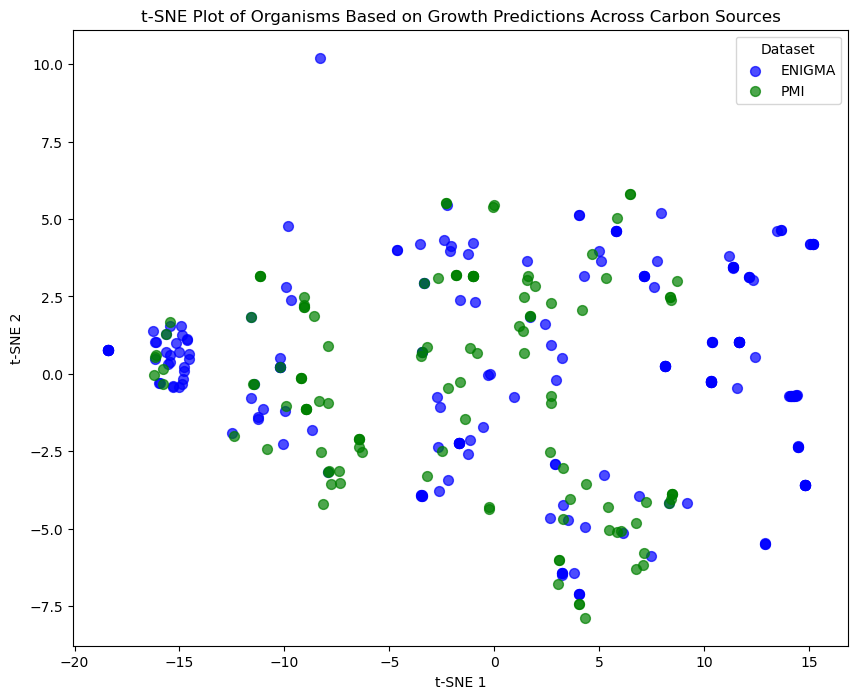

In [64]:
# Plotting the t-SNE results with color coding for each dataset
plt.figure(figsize=(10, 8))
colors = {'ENIGMA': 'blue', 'PMI': 'green'}

for dataset in colors:
    subset = tsne_df[tsne_df['Dataset'] == dataset]
    plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], s=50, alpha=0.7, label=dataset, color=colors[dataset])

plt.title("t-SNE Plot of Organisms Based on Growth Predictions Across Carbon Sources")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='Dataset')
plt.show()

### Explanation of the Code

#### 1. **What is Happening?**
This code iterates over dataset types (e.g., ENIGMA and PMI) to plot points in a 2D t-SNE space. The steps include:
- Filtering the data for each dataset type.
- Plotting the points with specific colors and labels for differentiation.

---

#### 2. **Explanation of Each Line**

#### **`for dataset in colors:`**
- **What It Does**: Iterates over the `colors` dictionary where:
  - Keys represent dataset types (e.g., `'ENIGMA'`, `'PMI'`).
  - Values represent colors assigned to those datasets (e.g., `'blue'`, `'green'`).

#### **`subset = tsne_df[tsne_df['Dataset'] == dataset]`**
- **What It Does**:
  - Filters the `tsne_df` DataFrame to select only rows belonging to the current dataset.
- **Why It’s Needed**:
  - Ensures points from each dataset are plotted separately with their own color.

#### **`plt.scatter(subset['t-SNE 1'], subset['t-SNE 2'], s=50, alpha=0.7, label=dataset, color=colors[dataset])`**
- **What It Does**:
  - Plots a scatter plot of points for the current dataset in the 2D t-SNE space.
  
- **Parameters**:
  - **`subset['t-SNE 1']`**, **`subset['t-SNE 2']`**: The x and y coordinates in the reduced 2D space.
  - **`s=50`**: Sets the point size to `50`.
  - **`alpha=0.7`**: Adds transparency to the points for better visualization of overlaps.
  - **`label=dataset`**: Adds a legend label for the dataset.
  - **`color=colors[dataset]`**: Assigns the predefined color to the dataset.

---

#### 3. **What Does It Accomplish?**
This loop creates a scatter plot where:
- Points for each dataset (e.g., ENIGMA and PMI) are plotted in 2D t-SNE space.
- Each dataset is visually distinguished using:
  - **Color** (e.g., blue for ENIGMA, green for PMI).
  - **Legend labels** indicating the dataset type.
- Transparency (`alpha=0.7`) makes overlapping points easier to interpret.

---



## About t-SNE Plot

- **Purpose**: The t-SNE plot provides an intuitive way to visualize high-dimensional relationships. 
  - Organisms with similar growth patterns (e.g., similar ability to utilize carbon sources) cluster together in the 2D space.
  
- **Interpretation**:
  - **Clusters**: Indicate groups of organisms with similar phenotypic profiles.
  - **Outliers**: Represent unique organisms with distinct growth patterns.

- **Applications**: This technique is widely used in biology for:
  - Clustering phenotypic or genetic data.
  - Exploratory data analysis in other fields.